# Simple Linear Regression 
In this little project, I am trying to campare simple linear regression by using least square methods ( methods that I learn during statistics class) and Machine Learning methods (using sk.learn model). The main objective of this project is to get familiar with Machine Learning basic concept and also comparing it to established statistical methods. 

Based on my reading, machine Learning methods, in this case {LinearRegression} function of {sklearn.model} is based on gradient descent algortihms. I still found it ambiguous why should we use Machine Learning for simple linear regression when we can compute using the traditional methods. This little project is my own initiative to get familiar and get the answer to my doubt. 

First, I compute linear regression, pearson correlation coefficient and coefficient of determination using methods that we learn in statistics class. I am comparing house price(million US dollar) vs living room area (square feet). Please mind that the data is taken from kaggle, hence it is unlikely to be reliable. The data set URL is https://www.kaggle.com/datasets/shree1992/housedata .



In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

house = pd.read_csv('housing.csv')

In [3]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


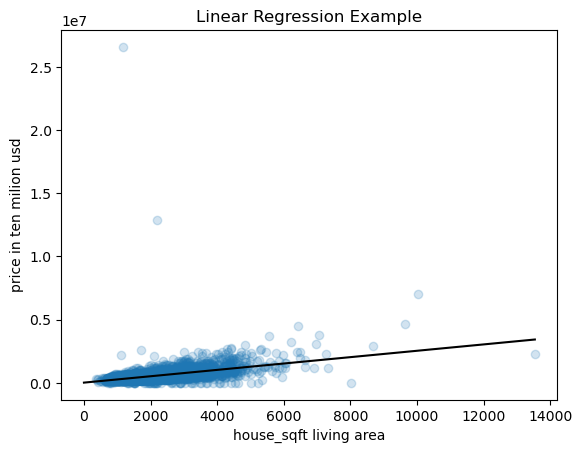


    < Summary of simple linear regression >
    Pearson Correaltion Coefficient (R) is 0.43041002543262796
    The linear regression equation is y = 251.95013105923712x + 12954.2423963818
    The coefficient of determination (R^2) is  0.18525278999291545
    
    < Meaning behind this regression>
    This means that the strenght of correlation between independent and dependent variable is 43.0410025432628%,
    but the strenght of the model ( ie the accuracy of the prediction compared to the real value ) of the model is 18.525278999291544%
    Exactly 18.525278999291544% of the vatiation of dependent variable can be explained by independent variable using this model
    
    <Fit of Regression Line>
    Null hypothesis : the regression line does not capture the relationship between variables
    H0 : variance of Reg <= variance of Res
    F-value = MSReg/MSRes 
    Thus, our F-value equal to 1045.4682359452552
    f-critical with 95% confidence level is 3.8434820402753695 
    

    F

In [6]:
data_raw = { 0 : house.sqft_living, 1 : house.price}
data = pd.DataFrame( data_raw)

data_regression = {}
data_regression_square = {}
total_data_regression_square = {}
for i in range(0,2):
    data_regression[i] = []
    data_regression_square[i] = []
    for x in data.loc[:,i]:
        regress = x - np.mean(data.loc[:,i])
        regress_square = ( x - np.mean(data.loc[:,i]) ) ** 2
        data_regression[i].append(regress)
        data_regression_square[i].append(regress_square)
    total_data_regression_square[i] = np.sum(data_regression_square[i])

multiplication_of_regress = []
for j in range(0,1):
    for y in range(0, len(data_regression[j])):
        multiply_2_regress = data_regression[j][y] * data_regression[j+1][y]
        multiplication_of_regress.append(multiply_2_regress)
    sum_of_multiplication = np.sum(multiplication_of_regress)
    pearson_correlation_coefficient = sum_of_multiplication / ( (np.sum(data_regression_square[j]) * np.sum(data_regression_square[j+1]) )** 0.5)
    sy = ((np.sum(data_regression_square[j+1])) / (len(data_regression_square[j+1])-1))  ** 0.5 
    sx = ((np.sum(data_regression_square[j] ))/ (len(data_regression_square[j])-1))  ** 0.5 
    b = pearson_correlation_coefficient * sy / sx
    a = np.mean(data.loc[:,j+1]) - b * np.mean(data.loc[:,j])
    x = np.linspace(0,max(data.loc[:,j]),20) 
    y_score = []
    for k in x:
        y = b * k + a
        y_score.append(y)
prediction= []
for l in data.loc[:,0]:
    y = b * l + a 
    prediction.append(y)
random_error = prediction - data.loc[:,1]        
SST = []
SSReg = []
SSRes = []
for m in range(0,len(data.loc[:,1])):
    sst = (data.loc[:,1][m] - np.mean(data.loc[:,1])) ** 2
    SST.append(sst)
    ssreg = (prediction[m] - np.mean(data.loc[:,1])) ** 2
    SSReg.append(ssreg)
    ssres = (data.loc[:,1][m] - prediction[m]) ** 2
    SSRes.append(ssres)
Total_SST = np.sum(SST)
Total_SSReg = np.sum(SSReg)
Total_SSRes = np.sum(SSRes)
R_squared = Total_SSReg / Total_SST
MSRes = Total_SSRes / (len(data.loc[:,1])-2)
MSReg = Total_SSReg / 1
f_value = MSReg / MSRes
f_critical = stats.f.ppf(q = 0.95, dfn = 1, dfd = (len(data.loc[:,1])-2))


plt.plot(x, y_score, color = 'black')
plt.title('Linear Regression Example')
plt.xlabel('house_sqft living area')
plt.ylabel('price in ten milion usd')
plt.scatter(data.loc[:,j],data.loc[:,j+1],alpha = 0.2)
plt.show()
    
text =    f"""
    < Summary of simple linear regression >
    Pearson Correaltion Coefficient (R) is {pearson_correlation_coefficient}
    The linear regression equation is y = {b}x + {a}
    The coefficient of determination (R^2) is  {R_squared}
    
    < Meaning behind this regression>
    This means that the strenght of correlation between independent and dependent variable is {pearson_correlation_coefficient * 100}%,
    but the strenght of the model ( ie the accuracy of the prediction compared to the real value ) of the model is {R_squared * 100}%
    Exactly {R_squared * 100}% of the vatiation of dependent variable can be explained by independent variable using this model
    
    <Fit of Regression Line>
    Null hypothesis : the regression line does not capture the relationship between variables
    H0 : variance of Reg <= variance of Res
    F-value = MSReg/MSRes 
    Thus, our F-value equal to {f_value}
    f-critical with 95% confidence level is {f_critical} 
    """
print(text)

if f_value > f_critical:
    print("""
    F-value > F-critical, using signifance level of alpha = 0.05, Null hypothesis is rejected.
    We can accept that the regression line is a good fit for data with 95% confidence level
    
    """)
else:
    print("""
    F-value < F-critical, using signifance level of alpha = 0.05, Null hypothesis is failed to be rejected.
    We can not accept that the regression line is a good fit for data with 95% confidence level
    
    """)

Here, I am going to use LinearRegression function from {sklearn.model}. All facts are as belows:

{LinearRegression} function of {sklearn.model} is based on gradient descent algortihms. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

We divide our sample into 2, which is the training data and testing data.
The train data are used to make regression line. The test data are used to test whether the regression line is fit enough. For the example below, the test data and train data proportion are as below:

1. test_size : 40% of data for training
2. train_size : 60% of all data

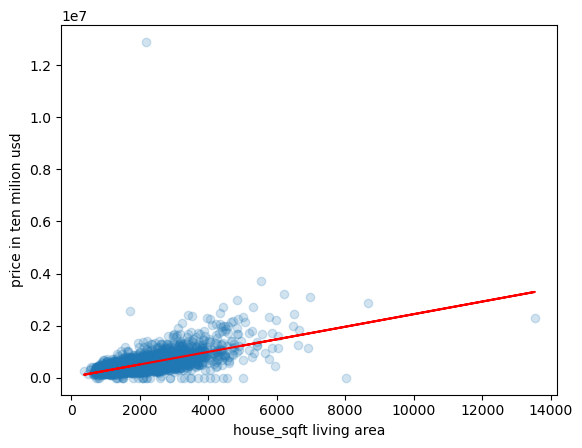


    < Summary of simple linear regression >
    The linear regression equation is y = [241.46592131]x + 27630.391133692057
    


In [7]:
#Train

from sklearn.model_selection import train_test_split
x = data[0]
y = data[1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = None)
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
c = lr.intercept_
m = lr.coef_
y_pred_train = m *x_train + c
y_pred_train.flatten()
y_pred_train1= lr.predict(x_train)
y_pred_train
plt.scatter(x_train,y_train,alpha = 0.2)
plt.plot(x_train,y_pred_train1,color = 'red')
plt.xlabel('house_sqft living area')
plt.ylabel('price in ten milion usd')
plt.show()

text =    f"""
    < Summary of simple linear regression >
    The linear regression equation is y = {m}x + {c}
    """
print(text)

Text(0, 0.5, 'dependent')

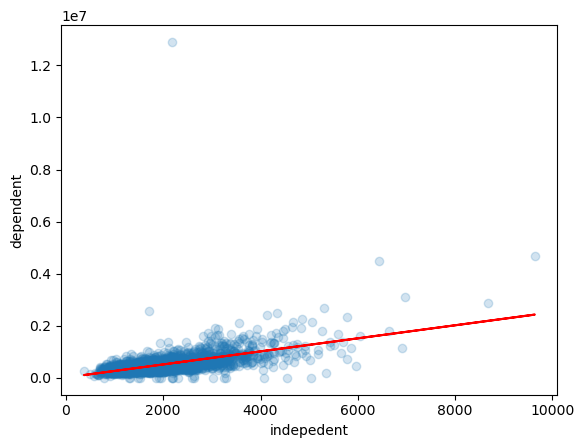

In [64]:
#Test

y_pred_test1= lr.predict(x_test)
y_pred_test1
plt.scatter(x_test,y_test,alpha = 0.2)
plt.plot(x_test,y_pred_test1,color = 'red')
plt.xlabel("indepedent")
plt.ylabel("dependent")